# Neuroscience, Learning, Memory, Cognition Course
## Sharif University of Technology


In [128]:
#@title Enter your information & "RUN the cell!!"
student_id =  98105138 #@param {type:"integer"}
student_name = "Zahra Soukhtedel" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 98105138
your name: Zahra Soukhtedel


##Exercise Outline : 
This exercise consist of two parts: in part (I) we would practice our python skills and in part (II) we would get familiar with some neuron models which may hear before in the course. You have to complete and deliver this .ipynb file and a report describing your result. Grades will be given based on your report and your code.

#** PART I: PYTHON PRACTICE**

**1) Working with arrays using PyLab**

In Python, there are several different data structures that are designed to store more than one element. Here we will focus on the `array` data structure, but if you are curious to know how and when to use other structures, there is a good explanation <a href='http://www.physics.nyu.edu/pine/pymanual/html/chap3/chap3_arrays.html'>here</a>. Let's define an array:

In [129]:
from pylab import *

In [130]:
a = array([[1, 2, 3, 4]])
b = array( [[0, 4, 7, 6]] )

In [131]:
print(a)

[[1 2 3 4]]


**Q.**

Search about pylab package and describe it shortly?

Multiply two defined arrays `a` and `b` using operator `*` and multiply(a,b). 
What operation does `multiply()` perform?

To see a list of the variables you've defined, type `who` or `whos` in a code block by themselves. Notice `whos` provides more information.

*`5 Points`* 


**Pylab** is a module that provides a Matlab like namespace by importing functions from the modules Numpy and Matplotlib. Numpy provides efficient numerical vector calculations based on underlying Fortran and C binary libraries. Matplotlib contains functions to create visualizations of data.

In [132]:
print("a * b = ", a * b)
print("multiply(a, b) = ", multiply(a, b))

a * b =  [[ 0  8 21 24]]
multiply(a, b) =  [[ 0  8 21 24]]


based on result above those operations works as dot product.
returns The product of arr1 and arr2, element-wise.

In [133]:
whos

Variable                     Type                          Data/Info
--------------------------------------------------------------------
ALLOW_THREADS                int                           1
Annotation                   type                          <class 'matplotlib.text.Annotation'>
Arrow                        type                          <class 'matplotlib.patches.Arrow'>
Artist                       type                          <class 'matplotlib.artist.Artist'>
AutoLocator                  type                          <class 'matplotlib.ticker.AutoLocator'>
Axes                         type                          <class 'matplotlib.axes._axes.Axes'>
AxisError                    type                          <class 'numpy.AxisError'>
BUFSIZE                      int                           8192
BitGenerator                 type                          <class 'numpy.random.bit_generator.BitGenerator'>
Button                       type                          <clas

**2) Defining a new function.**

Sometimes we'll need to write our own Python functions.  Let's do that now.

Our function will do something very simple: it will take as input a
vector and return as output the vector elements squared plus an additive
constant.

If have a vector, `v`, and a constant, `b`, we would like to call:

    vsq = my_square_function(v, b)
    
This won't work!  We first need to define `my_square_function`. Let's do so now,
please complete the function below:

*`5 Points`*


In [134]:
def my_square_function(x, c):
    """Square a vector and add a constant.

    Arguments:
    x -- vector to square
    c -- constant to add to the square of x
    """
    y = x ** 2 + c
    return y

In [135]:
my_square_function(a, 1)

array([[ 2,  5, 10, 17]])

The function begins with the keyword `def` followed by the function name and the inputs in parentheses. Notice that this first line ends with a colon `:`. All of the function components that follow this first line should be **indented one level**. This is just like the `for` loop we applied earlier; the operations performed by the for loop were indented one leve.

<div class="python-note">
    
When defining the function, the code the function executes should be indented one level.

</div>

The text inside triple quotes provides an optional documentation string that describes our function. While optional, including a '*doc string*' is an important part of making your code understandable and reuseable.

The keyword `return` exits the function, and in this case returns the expression `x * x + c`. Note that a return statement with no arguments returns `None`, indicating the absence of a value.

With the function defined, let's now call it. To do so we first define the inputs, and then run the function, as follows:

To see the doc string that describes our function, type `my_square_function?`

In [136]:
# Let's check that our docstring works
my_square_function?

**3) Loading matlab data (.mat) and plot power spectrum**


We consider data recorded in the scalp electroencephalogram or EEG. The EEG provides a measure of brain voltage activity with high temporal resolution (typically on the order of milliseconds) but poor spatial resolution (on the order of 10 cm2 of cortex). Here we will consider EEG activity recorded from a 
single scalp electrode. We will analyze these data to determine what (if any) rhythmic activity is present. In doing so, we will learn about an important technique to characterize rhythms in data - the Fourier transform and power spectral density or “spectrum”. please fill in the code below and plot the power spectral density.

The EEG data is available [here](https://drive.google.com/file/d/1RGvi6Tr8qhLPfBwo0A-kCKedFDqdPxYv/view?usp=sharing).

*`5 Points`*



In [137]:
##################################
# add all necessary packages here
##################################

from scipy.io import loadmat                    
from pylab import *                            
from numpy import where
from numpy.fft import fft, rfft
from scipy.signal import spectrogram
rcParams['figure.figsize']=(12,3)              

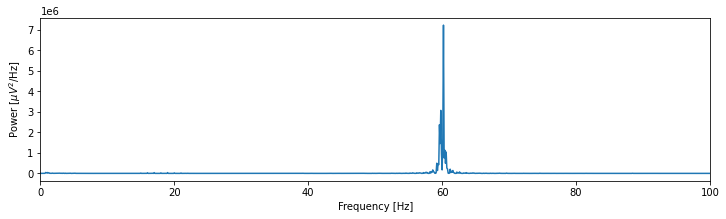

In [138]:
import numpy
data = loadmat("EEG-1.mat")  # Load the EEG data
EEG = data['EEG'].reshape(-1)         # Extract the EEG variable
t = data['t'][0]                      # ... and the t variable

x = EEG                               # Relabel the data variable
dt = t[1] - t[0]                      # Define the sampling interval
N = x.shape[0]                        # Define the total number of data points
T = N * dt                            # Define the total duration of the data

xf = fft(x)                 # Compute Fourier transform of x
Sxx = np.abs(xf) ** 2                     # Compute spectrum
Sxx = Sxx[:int(len(x) / 2)]                            # Ignore negative frequencies

df = 1 / T.max()                      # Determine frequency resolution
fNQ = 1 / dt / 2                      # Determine Nyquist frequency
faxis = arange(0,fNQ,df)              # Construct frequency axis

plot(faxis, Sxx.real)                 # Plot spectrum vs frequency
xlim([0, 100])                        # Select frequency range
xlabel('Frequency [Hz]')              # Label the axes
ylabel('Power [$\mu V^2$/Hz]')
show()

your result should be like below: 

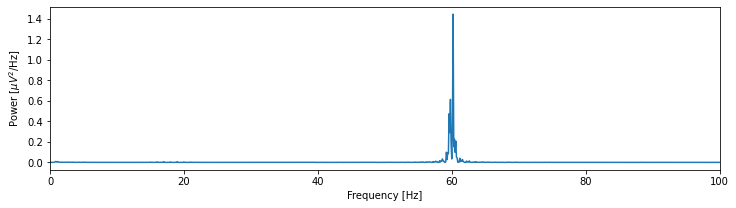

#** PART II: NEURON MODELS**

## Import necessary packages 


In [139]:
import numpy as np
import matplotlib.pyplot as plt

##################################
# add all necessary packages here
##################################


---
#The Leaky Integrate-and-Fire (LIF) model

This video introduces the reduction of a biological neuron to a simple leaky-integrate-fire (LIF) neuron model.

Now, it's your turn to implement one of the simplest mathematical model of a neuron: the leaky integrate-and-fire (LIF) model. The basic idea of LIF neuron was proposed in 1907 by Louis Édouard Lapicque, long before we understood the electrophysiology of a neuron (see a translation of [Lapicque's paper](https://pubmed.ncbi.nlm.nih.gov/17968583/) ). More details of the model can be found in the book [**Theoretical neuroscience**](http://www.gatsby.ucl.ac.uk/~dayan/book/) by Peter Dayan and Laurence F. Abbott.

The subthreshold membrane potential dynamics of a LIF neuron is described by

\begin{eqnarray}
C_m\frac{dV}{dt} = -g_L(V-E_L) + I,\quad (1)
\end{eqnarray}

where $C_m$ is the membrane capacitance, $V$ is the membrane potential, $g_L$ is the leak conductance ($g_L = 1/R$, the inverse of the leak resistance $R$), $E_L$ is the resting potential, and $I$ is the external input current. 

Dividing both sides of the above equation by $g_L$ gives

\begin{align}
\tau_m\frac{dV}{dt} = -(V-E_L) + \frac{I}{g_L}\,,\quad (2)
\end{align}

where the $\tau_m$ is membrane time constant and is defined as $\tau_m=C_m/g_L$. 

Note that dividing capacitance by conductance gives units of time! 

Below, we will use Eqn.(2) to simulate LIF neuron dynamics. 

If $I$ is sufficiently strong such that $V$ reaches a certain threshold value $V_{\rm th}$, $V$ is reset to a reset potential $V_{\rm reset}< V_{\rm th}$, and voltage is clamped to $V_{\rm reset}$ for $\tau_{\rm ref}$ ms, mimicking the refractoriness of the neuron during an action potential:

\begin{eqnarray}
\mathrm{if}\quad V(t_{\text{sp}})\geq V_{\rm th}&:& V(t)=V_{\rm reset} \text{  for } t\in(t_{\text{sp}}, t_{\text{sp}} + \tau_{\text{ref}}]
\end{eqnarray}
where $t_{\rm sp}$ is the spike time when $V(t)$ just exceeded $V_{\rm th}$.

</details>


The LIF model captures the facts that a neuron:
- performs spatial and temporal integration of synaptic inputs
- generates a spike when the voltage reaches a certain threshold
- goes refractory during the action potential
- has a leaky membrane

The LIF model assumes that the spatial and temporal integration of inputs is linear. Also, membrane potential dynamics close to the spike threshold are much slower in LIF neurons than in real neurons.

## Coding Exercise 1: Python code to simulate the LIF neuron

We now write Python code to calculate our equation for the LIF neuron and simulate the LIF neuron dynamics. We will use the Euler method, to numerically integrate this equation:

\begin{equation}
\tau_m\frac{dV}{dt} = -(V-E_L) + \frac{I}{g_L}\,
\end{equation}

where $V$ is the membrane potential, $g_L$ is the leak conductance, $E_L$ is the resting potential, $I$ is the external input current, and $\tau_m$ is membrane time constant.

The cell below initializes a dictionary that stores parameters of the LIF neuron model and the simulation scheme. You can use `pars=default_pars(T=simulation_time, dt=time_step)` to get the parameters. Note that, `simulation_time` and `time_step` have the unit `ms`. In addition, you can add the value to a new parameter by `pars['New_param'] = value`.

In [140]:
# @markdown Execute this code to initialize the default parameters


def default_pars(**kwargs):
  pars = {}

  # typical neuron parameters#
  pars['V_th'] = -55.     # spike threshold [mV]
  pars['V_reset'] = -75.  # reset potential [mV]
  pars['tau_m'] = 10.     # membrane time constant [ms]
  pars['g_L'] = 10.       # leak conductance [nS]
  pars['V_init'] = -75.   # initial potential [mV]
  pars['E_L'] = -75.      # leak reversal potential [mV]
  pars['tref'] = 2.       # refractory time (ms)

  # simulation parameters #
  pars['T'] = 400.  # Total duration of simulation [ms]
  pars['dt'] = .1   # Simulation time step [ms]

  # external parameters if any #
  for k in kwargs:
    pars[k] = kwargs[k]

  pars['range_t'] = np.arange(0, pars['T'], pars['dt'])  # Vector of discretized time points [ms]

  return pars


pars = default_pars()
print(pars)

{'V_th': -55.0, 'V_reset': -75.0, 'tau_m': 10.0, 'g_L': 10.0, 'V_init': -75.0, 'E_L': -75.0, 'tref': 2.0, 'T': 400.0, 'dt': 0.1, 'range_t': array([0.000e+00, 1.000e-01, 2.000e-01, ..., 3.997e+02, 3.998e+02,
       3.999e+02])}


Complete the function below to simulate the LIF neuron when receiving external current inputs. You can use `v, sp = run_LIF(pars, Iinj)` to get the membrane potential (`v`) and spike train (`sp`) given the dictionary `pars` and input current `Iinj`. please describe the function completely in your report, this show that you understand other parts of the code

*`15 Points`*

#### function description: 
first set the parameters values based on input of function.

second loop over time points and check if voltage in each time is bigger than vth, record it as spike and for refractory time after this happend reset voltages to v-reset. and update voltage for next point in time using eq2.

third get spike times in miliseconds.


(each part of function is described with comments in the cell below:)

In [141]:
def run_LIF(pars, Iinj, stop=False):
  """
  Simulate the LIF dynamics with external input current

  Args:
    pars       : parameter dictionary
    Iinj       : input current [pA]. The injected current here can be a value
                 or an array
    stop       : boolean. If True, use a current pulse

  Returns:
    rec_v      : membrane potential
    rec_sp     : spike times
  """

  # Set parameters
  V_th, V_reset = pars['V_th'], pars['V_reset']      # V threshold , V reset get its values from pars
  tau_m, g_L = pars['tau_m'], pars['g_L']            # membrance time constant, membrance conductnace valued from paras
  V_init, E_L = pars['V_init'], pars['E_L']          # initial value of v, resting potential
  dt, range_t = pars['dt'], pars['range_t']          # simulation time step, np array containing time points
  Lt = range_t.size                                  # number of time points
  tref = pars['tref']                                # refractory time

  # Initialize voltage
  v = np.zeros(Lt)                                   # make an np array to store voltage values in time points
  v[0] = V_init                                      # set first value of array to v_init in input parameters

  # Set current time course
  Iinj = Iinj * np.ones(Lt)                          # make an array for injected current in time points to a constant value in each time equal to Inij    

  # If current pulse, set beginning and end to 0
  if stop:                                           # set begining and end of the current array to 0,(like this: [00...0(mid-1000)......mid.......(mid+1000)0...00])
    Iinj[:int(len(Iinj) / 2) - 1000] = 0             
    Iinj[int(len(Iinj) / 2) + 1000:] = 0

  # Loop over time
  rec_spikes = []  # record spike times              # make a list to record spike times
  tr = 0.  # the count for refractory duration

  for it in range(Lt - 1):
    if tr > 0:  # check if in refractory period
      v[it] = V_reset  # set voltage to reset
      tr = tr - 1 # reduce running counter of refractory period

    elif v[it] >= V_th:  # if voltage over threshold
      rec_spikes.append(it)  # record spike event
      v[it] = V_reset  # reset voltage
      tr = tref / dt  # set refractory time

    ########################################################################
    ## TODO for students: compute the membrane potential v, spike train sp #
    # Fill out function and remove
    #raise NotImplementedError('calculate the dv/dt and the update step!')
    ########################################################################

    # Calculate the increment of the membrane potential
    dv = (-(v[it] - E_L) + Iinj[it] / g_L) * (dt / tau_m)         # caculate increment value using eq2

    # Update the membrane potential
    v[it + 1] = v[it] + dv                                        # update potential value for next step in time

  # Get spike times in ms 
  rec_spikes = np.array(rec_spikes) * dt                      

  return v, rec_spikes



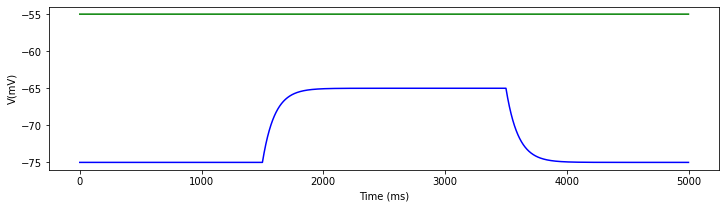

In [142]:
# Get parameters
pars = default_pars(T=500)

# Simulate LIF model
v, sp = run_LIF(pars, Iinj=100, stop=True)

# Visualize
def plott(v, pars, sp):
  fig, axs = plt.subplots()
  axs.plot(np.arange(0, v.shape[0], 1), v, color='blue')
  axs.plot(np.arange(0, v.shape[0], 1), pars['V_th'] * np.ones(v.shape[0]), color='green')
  if len(sp) != 0:
    axs.plot(np.arange(0, sp.shape[0], 1), sp, color='red')
  axs.set_xlabel("Time (ms)")
  axs.set_ylabel("V(mV)")
  plt.show()

plott(v, pars, sp)


*Example output:*

<img alt='Solution hint' align='left' width=820.0 height=539.0 src=https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/tutorials/W2D3_BiologicalNeuronModels/static/W2D3_Tutorial1_Solution_60a1e954_0.png>



---
# Response of an LIF model to different types of input currents



In the following section, we will learn how to inject direct current and white noise to study the response of an LIF neuron.

### Parameter exploration of Direct current (DC) input amplitude 
Please shows how the LIF neuron behavior changes for DC input (constant current) with different amplitudes.You may notice that the neuron generates a spike. But this is just a cosmetic spike only for illustration purposes. In an LIF neuron, we only need to keep track of times when the neuron hits the threshold so the postsynaptic neurons can be informed of the spike. 

How much DC is needed to reach the threshold (rheobase current)? How does the membrane time constant affect the frequency of the neuron?

*`10 Points`*

####solution:

####How much DC is needed to reach the threshold?

searching through different values of Iinj, from 100 to 300 by step size 5;
 we will show in below that at Iinj = 200 we will slightly reach threshold potential, and then at next step(Iinj = 205) we will strictly reach threshold and see spikes.

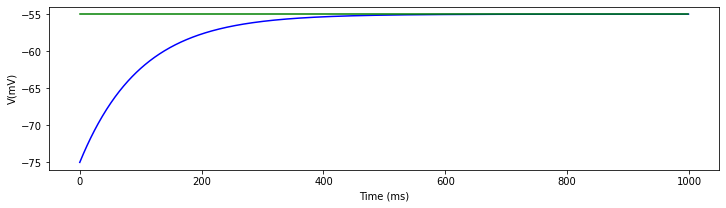

I_DC = 200
reaching threshold time, when having spikes(=sp is not empty): 


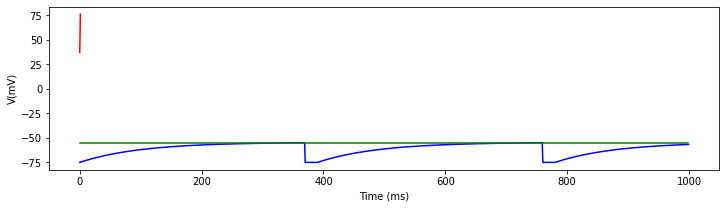

I_DC = 205


In [143]:
pars = default_pars(T=100.)
for i in np.arange(100, 300, 5):
  v, sp = run_LIF(pars, i)
  if np.abs(np.max(v) - pars['V_th']) <= 0.001:
    plott(v, pars, sp)
    plt.show()
    break

print("I_DC =", i)  

print("reaching threshold time, when having spikes(=sp is not empty): ")
for i in np.arange(100, 300, 5):
  v, sp = run_LIF(pars, i)
  if len(sp) != 0:
    plott(v, pars, sp)
    plt.show() 
    break
   
print("I_DC =", i,)  

####How does the membrane time constant affect the frequency of the neuron?

incresing the membrane time constant, means that membrance works slower because it needs more time to reach threshold after reseting to rest potential, so the firing rate decreases as shown below incresing tau decreses firing rate.

<ipython-input-141-2428a7b5735b>:57: RuntimeWarning: divide by zero encountered in double_scalars
  dv = (-(v[it] - E_L) + Iinj[it] / g_L) * (dt / tau_m)         # caculate increment value using eq2


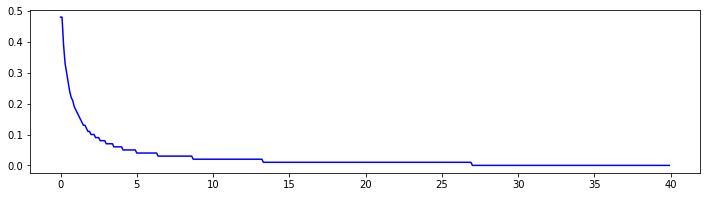

In [144]:
pars = default_pars(T=100.)
spike_counter = []
taus = np.arange(0, 40, 0.1)
for tau in taus:
  pars['tau_m'] = tau
  v, sp = run_LIF(pars, Iinj=205)
  spike_counter.append(len(sp) / pars['T'])


plot(taus, np.array(spike_counter), color='blue')   

## Gaussian white noise (GWN) current 


Given the noisy nature of neuronal activity _in vivo_, neurons usually receive complex, time-varying inputs.

To mimic this, we will now investigate the neuronal response when the LIF neuron receives Gaussian white noise $\xi(t)$ with mean 0 ($\mu = 0$) and some standard deviation $\sigma$.

Note that the GWN has zero mean, that is, it describes only the fluctuations of the input received by a neuron. We can thus modify our definition of GWN to have a nonzero mean value $\mu$ that equals the DC input, since this is the average input into the cell. The cell below defines the modified gaussian white noise currents with nonzero mean $\mu$.

### LIF neuron Explorer for noisy input


The mean of the Gaussian white noise (GWN) is the amplitude of DC. Indeed, when $\sigma = 0$, GWN is just a DC.

So the question arises how does $\sigma$ of the GWN affect the spiking behavior of the neuron. For instance we may want to know
1.  how does the minimum input (i.e., $\mu$) needed to make a neuron spike change with increase in $\sigma$
2.  how does the spike regularity change with increase in $\sigma$

Please fill the my_GWN function to generate the noisy input current and then answer the question above: `my_GWN(pars, mu, sig, myseed=False)`.  Note that fixing the value of the random seed (e.g., `myseed=2020`) will allow you to obtain the same result every time you run this. We then use our `run_LIF` function to simulate the LIF model.

*`15 Points`*

In [145]:
def my_GWN(pars, mu, sig, myseed=False):
  """
  Function that generates Gaussian white noise input

  Args:
    pars       : parameter dictionary
    mu         : noise baseline (mean)
    sig        : noise amplitute (standard deviation)
    myseed     : random seed. int or boolean
                 the same seed will give the same
                 random number sequence

  Returns:
    I          : Gaussian white noise input
  """

  # Retrieve simulation parameters
  dt, range_t = pars['dt'], pars['range_t']
  Lt = range_t.size

  # Set random seed
  if myseed:
      np.random.seed(seed=myseed)
  else:
      np.random.seed()

  # Generate GWN and convert units to sec.
  I_gwn = sig * np.random.randn(Lt) / ((dt * .001) ** 0.5) + mu

  return I_gwn

help(my_GWN)

Help on function my_GWN in module __main__:

my_GWN(pars, mu, sig, myseed=False)
    Function that generates Gaussian white noise input
    
    Args:
      pars       : parameter dictionary
      mu         : noise baseline (mean)
      sig        : noise amplitute (standard deviation)
      myseed     : random seed. int or boolean
                   the same seed will give the same
                   random number sequence
    
    Returns:
      I          : Gaussian white noise input



####solution:

####1. how does the minimum input (i.e.,  μ ) needed to make a neuron spike change with increase in  σ?

in the code below we will show that for $\mu = 105$, increasing $\sigma$ causes spike changing, thus this is the minimum value.

with $\sigma$ increasing, the minimum $\mu$ needed to make a neuron spike, is smaller as fluctuations to add to $\mu$ to get greater than threshold.

for mu = 105 ,sigma = 4.5 , we have spike changing respect to sigma incresing like below:


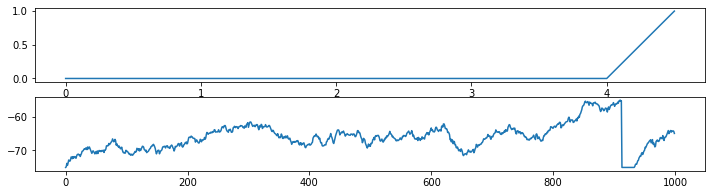

In [146]:
mu = np.arange(100, 300, 5)
sigma = np.arange(0, 5, 0.5)

pars = default_pars(T=100.)
for m in mu:
  spike_counter = []
  for s in sigma:
    I_GWN = my_GWN(pars, mu=m, sig=s)
    v, sp = run_LIF(pars, Iinj=I_GWN)
    spike_counter.append(len(sp))
  spike_counter = np.array(spike_counter)  
  if np.max(spike_counter) > 0 :
    print("for mu =", m , ",sigma =", sigma[np.argmax(spike_counter)], ", we have spike changing respect to sigma incresing like below:")
    fig, axs = plt.subplots(2)
    axs[0].plot(sigma, np.array(spike_counter))
    axs[1].plot(np.arange(0, v.shape[0]), v)
    break

####2.how does the spike regularity change with increase in  σ?


the higher the $\sigma$, the more irregular the spikes are. the $\sigma$ specifies amount of irregularity of the spikes.

### Analyzing GWN Effects on Spiking
- As we increase the input average ($\mu$) or the input fluctuation ($\sigma$), the spike count changes. How much can we increase the spike count, and what might be the relationship between GWN mean/std or DC value and spike count? 

- We have seen above that when we inject DC, the neuron spikes in a regular manner (clock-like), and this regularity is reduced when GWN is injected. The question is, how irregular can we make the neurons spiking by changing the parameters of the GWN? 

We will see the answers to these questions in the next section but discuss first!

*`5 Points`*


####Solution:
if the voltage goes above the threshold and do circular behavier of spiking and geting back to reset potential and again spiking, ...

but each spiking takes some time that depends on refractory time, so at most we will have N spikes (N = proportion of total time devided by refractory time).

the higher gwn mean or dc input gets, the bigger number of spikes gets. because with higher value for mean I or I_dc, effective voltage reaches threshold and causes spikes.


Increasing mean value, for some effective mean is greater than threshold so all neuron does is changing between spike threshold and rest potential, it is a regular spiking. witch means that increasing mean value decreses irregularity.

Increasing $\sigma$ causes linearity.




### The interspike interval (ISI)
The ISI is the time between subsequent action potentials (also known as spikes) of a single or group of neuron. 
Please search a little bit about this concept and discuss it in your report. 
*`5 Points`*

An interspike-interval histogram is one of the ways by which experimental neurophysiologists analyse the electrical behaviour of neurons in the brain.

ISI distributions of cortical neurons exhibit a range of different shapes. Wide ISI distributions are believed to stem from a balance of excitatory and inhibitory inputs that leads to a strongly fluctuating total drive.

The interspike interval is the time between subsequent action potentials (also known as spikes) of a neuron, or a group average thereof. Action potentials are propagated along the axons of a neuron, to reach the nerve terminals, where they can trigger the release of chemical messengers to affect other neurons. Accordingly, electrophysiologists, who study the electrical behaviour of neurons, are interested in the patterning of spikes in particular neurons, which they typically analyze by way of an interspike interval histogram.

A common simplification in the study of neural spike generators lies in the assumption that times between subsequent spikes, the interspike intervals (ISIs), are statistically independent.



---
# Firing rate and spike time irregularity


When we plot the output firing rate as a function of GWN mean or DC value, it is called the input-output transfer function of the neuron (so simply F-I curve).

Spike regularity can be quantified as the **coefficient of variation (CV) of the interspike interval (ISI)**:

\begin{equation}
\text{CV}_{\text{ISI}} = \frac{std(\text{ISI})}{mean(\text{ISI})}
\end{equation}

A Poisson train is an example of high irregularity, in which $\textbf{CV}_{\textbf{ISI}} \textbf{= 1}$. And for a clocklike (regular) process we have $\textbf{CV}_{\textbf{ISI}} \textbf{= 0}$ because of **std(ISI)=0**.

## F-I Explorer for different `sig_gwn`

How does the F-I curve of the LIF neuron change as we increase the $\sigma$ of the GWN? We can already expect that the F-I curve will be stochastic and the results will vary from one trial to another. But will there be any other change compared to the F-I curved measured using DC?

write a simple code and show how the F-I curve of a LIF neuron changes for different levels of fluctuation $\sigma$.

*`10 Points`*

####Solution:

as shown below with the result of next cell we can coclude:

in DC current, the F-I curve is determinidtic and it's shape can be caculated using membrance eq.( graph with red color witch stayes deterministic)

in GWN current, increasing $\sigma$ leads F-I curve to be more linear, and reaches threshold with smaller values of $\mu$.( graph with blue color witch gets more linear with incresing $\sigma$ value.


sigma = 0.0


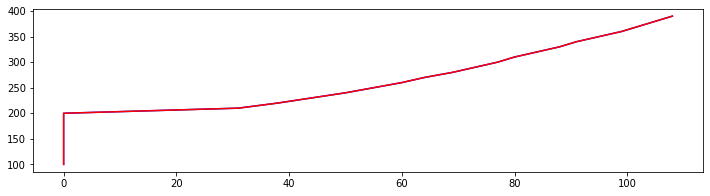

sigma = 0.5


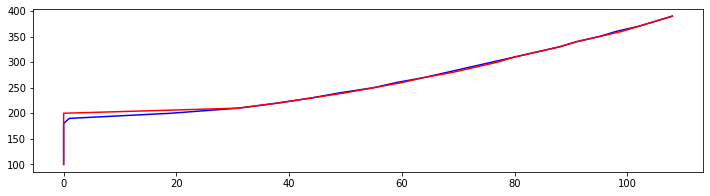

sigma = 1.0


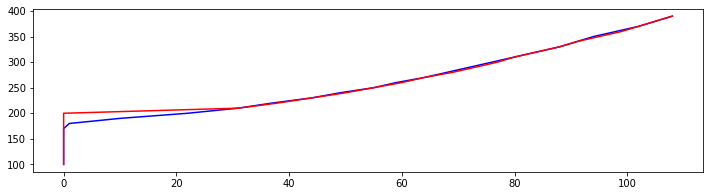

sigma = 1.5


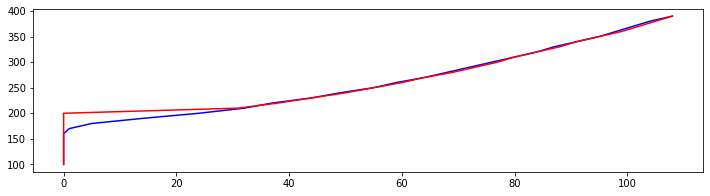

sigma = 2.0


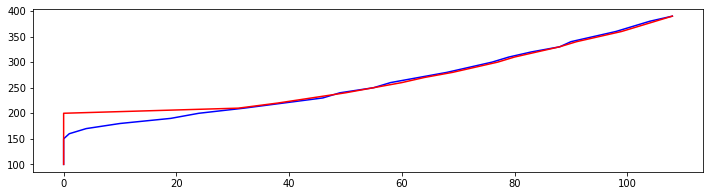

sigma = 2.5


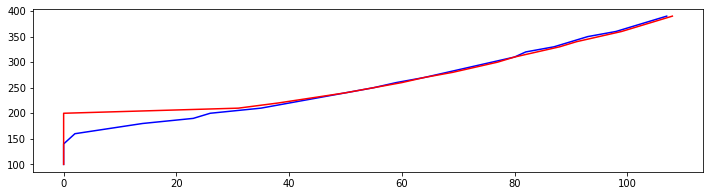

sigma = 3.0


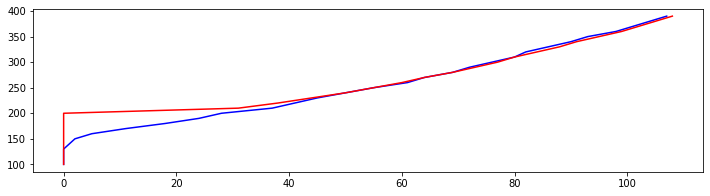

sigma = 3.5


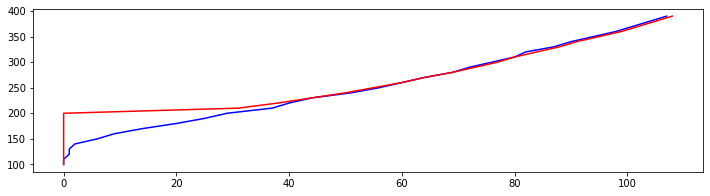

sigma = 4.0


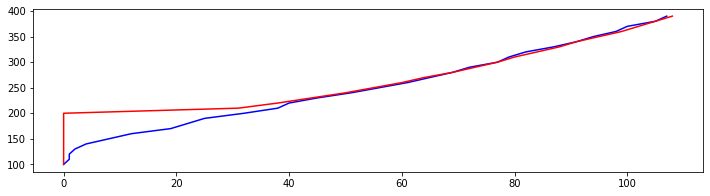

sigma = 4.5


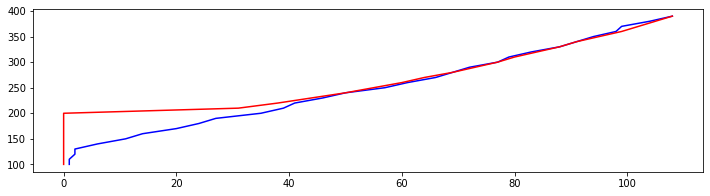

sigma = 5.0


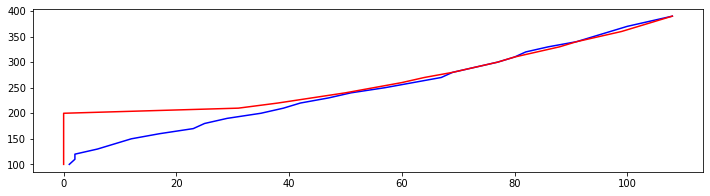

sigma = 5.5


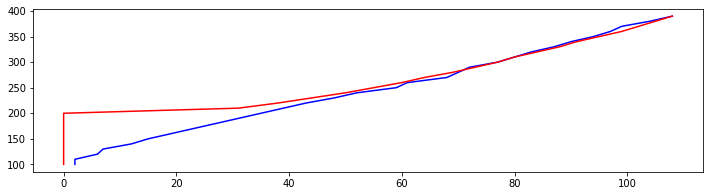

sigma = 6.0


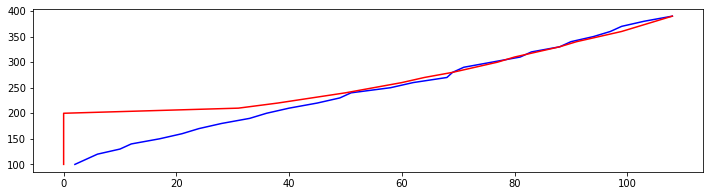

sigma = 6.5


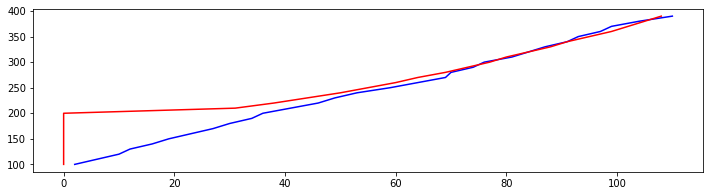

sigma = 7.0


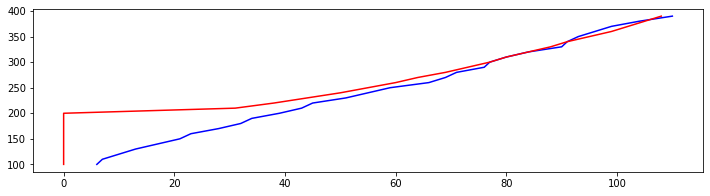

sigma = 7.5


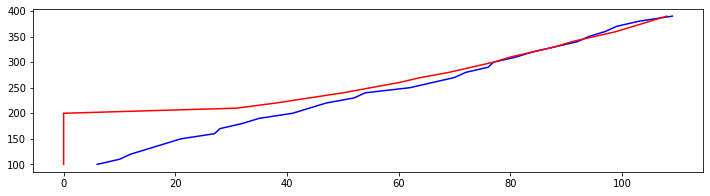

sigma = 8.0


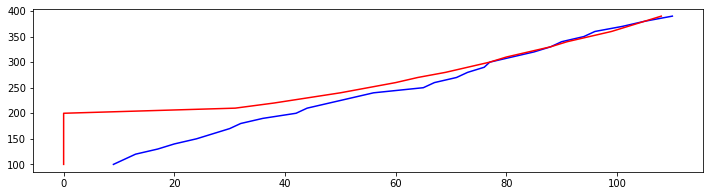

sigma = 8.5


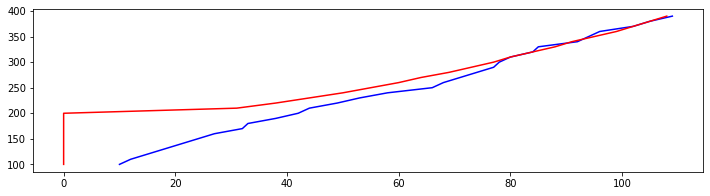

sigma = 9.0


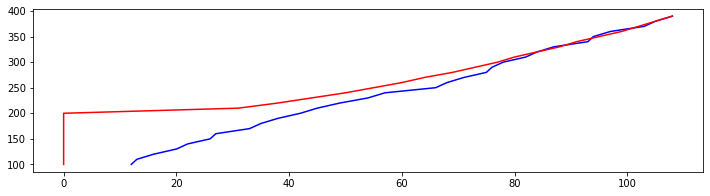

sigma = 9.5


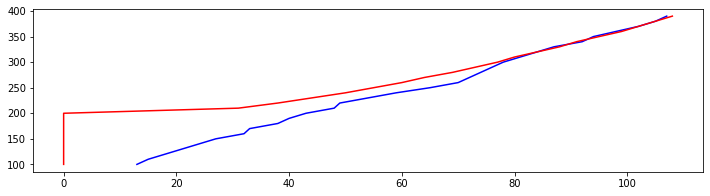

sigma = 10.0


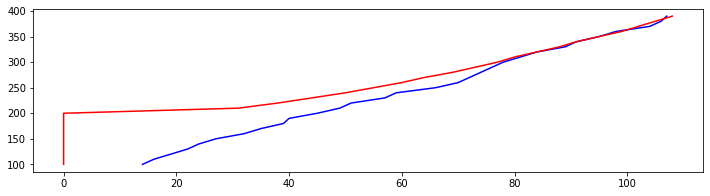

In [147]:
sigma = np.arange(0, 10.5, 0.5)
pars = default_pars(T=1000.)
mu = np.arange(100., 400., 10.)
gwn_spike_counter = []
dc_spike_counter = []
for s in range(len(sigma)):
  gwn_spike_counter = []
  dc_spike_counter = []
  print("sigma =", sigma[s])
  for i in range(len(mu)):
    v, sp = run_LIF(pars, Iinj=my_GWN(pars, mu=mu[i], sig=sigma[s], myseed=1000))
    v_dc, sp_dc = run_LIF(pars, Iinj=mu[i])
    gwn_spike_counter.append(len(sp))
    dc_spike_counter.append(len(sp_dc))
  
  fig, axs = plt.subplots()
  axs.plot(gwn_spike_counter, mu, 'b')
  axs.plot(dc_spike_counter, mu, 'r')
  plt.show()


## Compute $CV_{ISI}$ values

The fluctuation can also change the irregularity of the spikes. Let's investigate the effect of $\mu=250$ with $\sigma=0.5$ vs $\sigma=3$. 

Fill in the code below to compute ISI, then plot the histogram of the ISI and compute the $CV_{ISI}$. Note that, you can use `np.diff` to calculate ISI.

*`10 Points`*

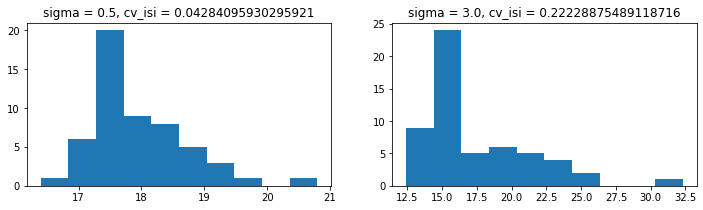

In [148]:
def isi_cv_LIF(spike_times):
  """
  Calculates the interspike intervals (isi) and
  the coefficient of variation (cv) for a given spike_train

  Args:
    spike_times : (n, ) vector with the spike times (ndarray)

  Returns:
    isi         : (n-1,) vector with the inter-spike intervals (ms)
    cv          : coefficient of variation of isi (float)

  """
  ########################################################################
  ## TODO for students: compute the membrane potential v, spike train sp #
  # Fill out function and remove
  ########################################################################
  if len(spike_times) >= 2:
    # Compute isi
    isi = np.diff(spike_times)
    # Compute cv
    cv = isi.std()/isi.mean()
  else:
    isi = np.nan
    cv = np.nan

  return isi, cv


# Set parameters
pars = default_pars(T=1000.)
mu_gwn = 250
sig_gwn1 = 0.5
sig_gwn2 = 3.0

# Run LIF model for sigma = 0.5
I_GWN1 = my_GWN(pars, mu=mu_gwn, sig=sig_gwn1, myseed=2020)
_, sp1 = run_LIF(pars, Iinj=I_GWN1)

# Run LIF model for sigma = 3
I_GWN2 = my_GWN(pars, mu=mu_gwn, sig=sig_gwn2, myseed=2020)
_, sp2 = run_LIF(pars, Iinj=I_GWN2)

# Compute ISIs/CV
isi1, cv1 = isi_cv_LIF(sp1)
isi2, cv2 = isi_cv_LIF(sp2)

# Visualize
fig, axs = plt.subplots(1, 2)
axs[0].hist(isi1)
axs[0].set_title("sigma = "+str(sig_gwn1) + ", cv_isi = " + str(cv1))
axs[1].hist(isi2)
axs[1].set_title("sigma = "+str(sig_gwn2) + ", cv_isi = " + str(cv2))
plt.show()




*Example output:*

<img alt='Solution hint' align='left' width=1078.0 height=378.0 src=https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/tutorials/W2D3_BiologicalNeuronModels/static/W2D3_Tutorial1_Solution_27d69c89_0.png>



## Spike irregularity explorer for different `sig_gwn`

How different levels of fluctuation $\sigma$ affect the CVs for different average injected currents ($\mu$)?

1. Does the standard deviation of the injected current affect the F-I curve in any qualitative manner?
2. Why does increasing the mean of GWN reduce the CV$_{\rm ISI}$?
3.  If you plot spike count (or rate) vs. CV$_{\rm ISI}$, should there be a relationship between the two? Try out yourself.

*`15 Points`*

####Solution:

####1.Does the standard deviation of the injected current affect the F-I curve in any qualitative manner?

Yes. 
if the input current is dc, then F-I curve is non-linear.
but when input current is GWN, increasing $\sigma$ leads F-I curve to be more linear, in this case noise suppress the non-linearity and causes a nouron act like a linear system.


####2. Why does increasing the mean of GWN reduce the CV ISI ?

Increasing mean value, for some effective mean is greater than threshold so the neuron operates in the mean-driven regime. Also when input is high, all neuron does is changing between spike threshold and rest potential, it is a regular spiking. witch means that irregularity measure like cv gets smaller value.

####3. If you plot spike count (or rate) vs. CV ISI , should there be a relationship between the two? Try out yourself.

Increasing firing rate gets possible for greater values of GWN mean. so we have, increasing mean, causes increasing in firing rate, and then more regular behaver of neuron, and then decreasing $CV_{ISI}$.
so we expect to see increasing in firing rate causes decreasing $CV_{ISI}$.(but for a Poisson process there is no relationship between spike rate and spike
irregularity.)


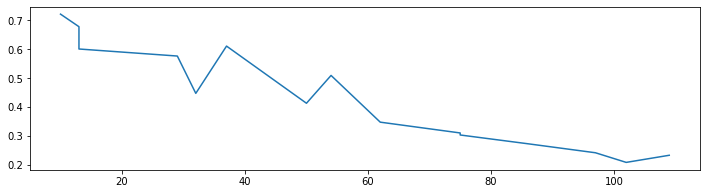

In [149]:
sigma = 6.6
pars = default_pars(T=1000.)
mu = np.arange(100., 400., 20)
spike_counter = np.zeros(len(mu))
cv_isi = np.empty(len(mu))

for i in range(len(mu)):
  gwn_i = my_GWN(pars, mu=mu[i], sig=sigma)
  v, sp = run_LIF(pars, Iinj=gwn_i)
  if len(sp) > 3:
    isi = np.diff(sp)
    cv_isi[i] = np.std(isi) / np.mean(isi)
    spike_counter[i] = len(sp)

plot(spike_counter, cv_isi)  

---
## Ornstein-Uhlenbeck Process

When a neuron receives spiking input, the synaptic current is Shot Noise -- which is a kind of colored noise and the spectrum of the noise determined by the synaptic kernel time constant. That is, a neuron is driven by **colored noise** and not GWN.

We can model colored noise using the Ornstein-Uhlenbeck process - filtered white noise. 

We next study if the input current is temporally correlated and is modeled as an Ornstein-Uhlenbeck process $\eta(t)$, i.e., low-pass filtered GWN with a time constant $\tau_{\eta}$: 

\begin{equation}
\tau_\eta \frac{d}{dt}\eta(t) = \mu-\eta(t) + \sigma_\eta\sqrt{2\tau_\eta}\xi(t)
\end{equation}

**Hint:** An OU process as defined above has

\begin{equation}
\mathbb{E}[\eta(t)]=\mu
\end{equation}

and autocovariance 

\begin{equation}
[\eta(t)\eta(t+\tau)]=\sigma_\eta^2e^{-|t-\tau|/\tau_\eta}
\end{equation}

which can be used to check your code. 

In the following, we will check how a neuron responds to a noisy current that follows the statistics of an OU process. please fill the my_OU function and run your LIF model with OU process input current, then answer question below:

-  How does the OU type input change neuron responsiveness? 
-  What do you think will happen to the spike pattern and rate if you increased or decreased the time constant of the OU process?

*`15 Points`*

In [50]:
def my_OU(pars, mu, sig, myseed=False):
  """
  Function that produces Ornstein-Uhlenbeck input

  Args:
    pars       : parameter dictionary
    sig        : noise amplitute
    myseed     : random seed. int or boolean

  Returns:
    I_ou       : Ornstein-Uhlenbeck input current
  """

  # Retrieve simulation parameters
  dt, range_t = pars['dt'], pars['range_t']
  Lt = range_t.size
  tau_ou = pars['tau_ou']  # [ms]

  # set random seed
  if myseed:
    np.random.seed(seed=myseed)
  else:
    np.random.seed()

  # Initialize
  noise = np.random.randn(Lt)
  I_ou = np.zeros(Lt)
  I_ou[0] = noise[0] * sig

  # generate OU
  for it in range(Lt-1):
    I_ou[it+1] = (dt / tau_ou) * (mu - I_ou[it]) + ((2 * dt / tau_ou) ** 2) * noise[it + 1] * sig + I_ou[it]

  return I_ou


help(my_OU)

Help on function my_OU in module __main__:

my_OU(pars, mu, sig, myseed=False)
    Function that produces Ornstein-Uhlenbeck input
    
    Args:
      pars       : parameter dictionary
      sig        : noise amplitute
      myseed     : random seed. int or boolean
    
    Returns:
      I_ou       : Ornstein-Uhlenbeck input current



####solution 

How does the OU type input change neuron responsiveness? What do you think will happen to the spike pattern and rate if you increased or decreased the time constant of the OU process?

When input current is flat and the OU process time constant is very long, we expect decreasing in firing rate and more regular spiking behavier of neron.
So increasing OU process time constant with other parameters keeping constant, we expect decreasing in firing rate and cv_isi. we can also relate it to membrance time constant as its doing same operation.


we plotted neuron's firing rate respect to defrrent values of time constant down here:(decreasing behavier is shown below) 

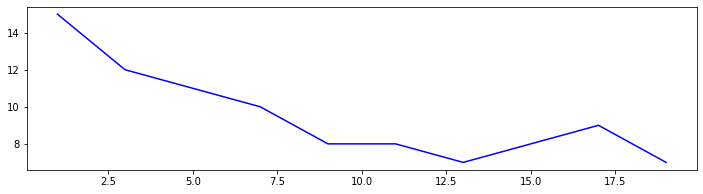

In [150]:
tau = np.arange(1, 20, 2)
spike_counter = []

pars = default_pars(T=1000.)
for t in tau:
  pars['tau_ou'] = t  # [ms]
  I_ou = my_OU(pars, 200, 40)
  v, sp = run_LIF(pars, Iinj=I_ou)
  spike_counter.append(len(sp))

fig, axs = plt.subplots()
axs.plot(tau, spike_counter, 'b')
plt.show()

---
## Extensions to Integrate-and-Fire models


LIF model is not the only abstraction of real neurons. If you want to learn about more realistic types of neuronal models, please search about "Generalized Integrate-and-Fire models" and discuss it in your report. 

*`5 Points`*

####solution:
In GLIF models, the mechanisms are separated by time scale: GLIF models aim to represent the slow linear sub-threshold behavior of a neuron and recreate the spike times, not the shape of the action potential caused by fast, non-linear ion channels. Thus, none of the fast, non-linear processes associated with the action potential itself are included directly in the dynamics. However, some attributes of the spike, such as spike width and voltage after a spike relative to voltage before a spike, are accounted for in the reset rules which map the state before the spike to the state thereafter.

A standard LIF model was our starting point, progressing to more generalized leaky integrate-and-fire models. In the standard LIF model (GLIF1 here), current injected into the cell causes the voltage to rise in a linear fashion. When the voltage reaches a fixed threshold (referred to as Θ∞ here) the model spikes and the threshold is reset to the resting potential of the neuron.

he GLIF2 model advances the GLIF1 model by incorporating more realistic reset rules (R) for voltage and threshold. The rapid changes of the action potentials are followed by slower dynamics which affect a neuron’s state. The voltage after a spike does not reset to rest and the threshold does not remain at a fixed value. This GLIF2 model continues to assume that the spikes are sufficiently similar such that a mapping between the voltage and threshold state before and after a spike can be found. The specific linear relationship of the voltage after the spike as a function of the voltage before the spike is found directly from the electrophysiological data.This relationship also defines the width of a spike or the “refractory period” which is implemented as a time in which the model cannot produce another spike. In addition to the refractory period, it is often more difficult to cause a neuron to spike again after a first spike due to mechanisms such as the slow inactivation of voltage-dependent currents which activate during the spike. This difficulty in causing another spike is modeled as a rise in threshold that decays after the spike and is again extracted directly from the data .

Although GLIF models do not aim to recreate the shape of an action potential caused by fast non-linear ion channel activation, the GLIF3 model does incorporate the longer term effects of ion channels. Here we assume that ion channel currents have a stereotyped activation following a spike, and we bundle all slow ion-channel effects into a set of two after-spike currents (ASC) with different time scales. These currents are again fit directly from the data.

The GLIF4 model incorporates both reset rules of GLIF2 and the after-spike currents of GLIF3.

Finally, slow depolarization can lead to partial inactivation of the voltage-dependent sodium current which generates a spike. In GLIF5 we incorporate this mechanism into an adapting threshold (AT) which is dependent on the membrane potential.

Note that the number of variables increases from one (V(t)) for GLIF1 to two (V(t), Θs(t)
) for GLIF2, etc., up to five for GLIF5 

---
#The Hodgkin-Huxley model

The Hodgkin–Huxley model, or conductance-based model, is a mathematical model that describes how action potentials in neurons are initiated and propagated. It is a set of nonlinear differential equations that approximates the electrical characteristics of excitable cells such as neurons and muscle cells. It is a continuous-time dynamical system.

Alan Hodgkin and Andrew Huxley described the model in 1952 to explain the ionic mechanisms underlying the initiation and propagation of action potentials in the squid giant axon.They received the 1963 Nobel Prize in Physiology or Medicine for this work. [link text](https://en.wikipedia.org/wiki/Hodgkin%E2%80%93Huxley_model)

4 eqs of Hodgkin-Huxley model  
* $C_M\displaystyle \frac{dV}{dt}=-g_{Na}(V-V_{Na})-g_k(V-V_K)-g_l(V-V_l)+I$ ($V$: Membrane Potential)  
* $\displaystyle \frac{dh}{dt}=\alpha_h{(V)}(1-h)-\beta_h(V)h$ ($h$: Na Inactivation)  
* $\displaystyle \frac{dm}{dt}=\alpha_m{(V)}(1-m)-\beta_m(V)m$ ($m$: Na Activation)  
* $\displaystyle \frac{dn}{dt}=\alpha_n{(V)}(1-n)-\beta_n(V)n$ ($n$: K Activation)  

Please fill the code below and discuss the whole code step by step in your report. 

*`5 Points`*

####Solution:

first we have different functions defining each rate constants $\alpha$, $\beta$ for the i-th ion channel. In which n, m, h are associated with potassium channel subunit activation, sodium channel subunit activation, and sodium channel subunit inactivation, respectively.

And then defyning hh model, first initializing its parameter values and then filling each v, n, m, h in each time points using equations above. (some comments added to explain each parameter)

In [151]:
import numpy as np
import math

In [152]:
def alphaM(V):
    return (2.5-0.1*(V+65)) / (np.exp(2.5-0.1*(V+65)) -1)

def betaM(V):
    return 4*np.exp(-(V+65)/18)

def alphaH(V):
    return 0.07*np.exp(-(V+65)/20)

def betaH(V):
    return 1/(np.exp(3.0-0.1*(V+65))+1)

def alphaN(V):
    return (0.1-0.01*(V+65)) / (np.exp(1-0.1*(V+65)) -1)

def betaN(V):
    return 0.125*np.exp(-(V+65)/80)

def HH(I0,T0):
    dt = 0.01;
    T  = math.ceil(T0/dt)  # [ms]
    gNa0 = 120   # [mS/cm^2] maximum conductivity of Na+ Channel
    ENa  = 115;  # [mV]  Na+ nernst potential(m)
    gK0  = 36;   # [mS/cm^2] maximum conductivity of K+ Channel
    EK   = -12;  # [mV] K+ nernst potential(n)
    gL0  = 0.3;  # [mS/cm^2] conductivity of leak Channel
    EL   = 10.6; # [mV] nernst potential for leak channel(h)

    t = np.arange(0,T)*dt
    V = np.zeros([T,1])
    m = np.zeros([T,1])
    h = np.zeros([T,1])
    n = np.zeros([T,1])

    V[0]=-70.0
    m[0]=0.05
    h[0]=0.54
    n[0]=0.34

    for i in range(0,T-1):
        V[i+1] = V[i] + dt* (gNa0*m[i]**3*h[i]*(ENa-(V[i]+65)) + gK0*n[i]**4*(EK-(V[i]+65)) + gL0*(EL-(V[i]+65)) + I0)
        m[i+1] = m[i] + dt* (alphaM(V[i])*(1-m[i]) - betaM(V[i])*m[i])
        h[i+1] = h[i] + dt* (alphaH(V[i])*(1-h[i]) - betaH(V[i])*h[i])
        n[i+1] = n[i] + dt* (alphaN(V[i])*(1-n[i]) - betaN(V[i])*n[i])


        
    return V,m,h,n,t

## At low input current (`I0`), examine the HH dynamics.

  To understand how the HH model works, we'll start by focusing on the
  case when `I0` is small. Let's fix the input current to zero,

In [153]:
I0 = 0

and let's simulate the model for 100 ms,

In [154]:
T0 = 100

We've now defined both inputs to the `HH` function, and can execute it, as follows,

In [155]:
[V,m,h,n,t]=HH(I0,T0)

Notice that the function returns five outputs, which we assign to the variables `V`, `m`, `h`, `n`, and `t`.


What are the dynamics of the voltage (variable `V`) resulting
from this simulation?<br>
HINT:  Plot `V` vs `t`.

What are the dynamics of the gating variables (`m`, `h`, `n`)
resulting from this simulation?<br>

What are the final values (after the 100 ms of simulation) of
`V`, `m`, `h`, and `n`?

*`15 Points`*

Answer the above question using (`I0=10`).
*`5 Points`*

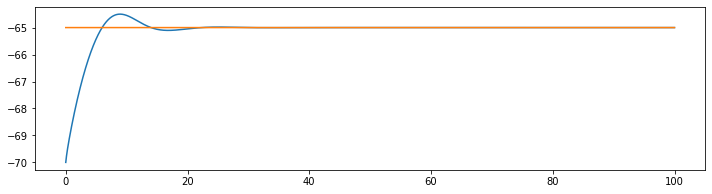

In [156]:
plt.plot(t, V)
plt.plot(t, np.ones(t.shape) * -65)                 

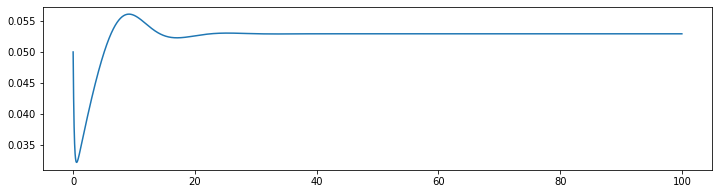

In [157]:
plt.plot(t, m) 
  

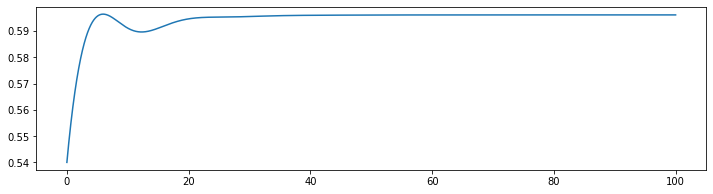

In [158]:
plt.plot(t, h)   

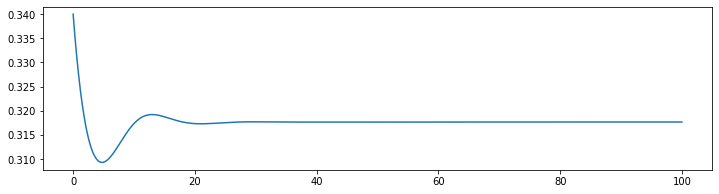

In [159]:
plt.plot(t, n)

In [160]:
def print_finals(V, m, n, h):
  print("Final values of V, m, h, and n are as follws:")
  print("V_final =", V[-1])
  print("m_final =", m[-1])
  print("h_final =", h[-1])
  print("n_final =", n[-1])

print_finals(V, m, n, h)  

Final values of V, m, h, and n are as follws:
V_final = [-64.99972253]
m_final = [0.05293422]
h_final = [0.59611093]
n_final = [0.31768116]


now for I_0 = 10:

In [161]:
[V,m,h,n,t]=HH(10,T0)

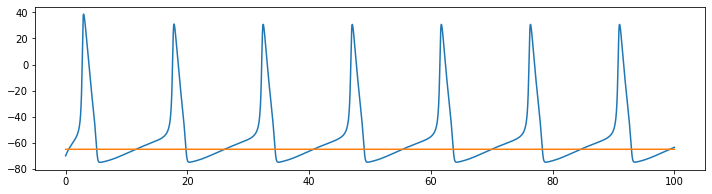

In [162]:
plt.plot(t, V)
plt.plot(t, np.ones(t.shape) * -65)   

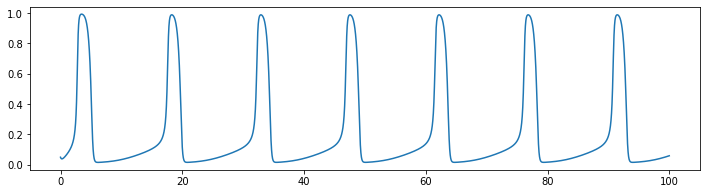

In [163]:
plt.plot(t, m)

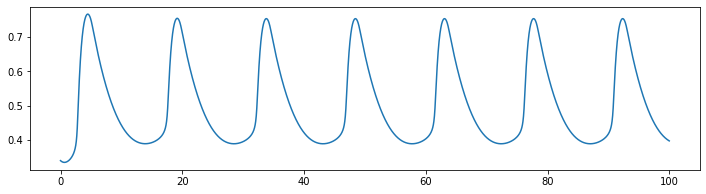

In [164]:
plt.plot(t, n) 

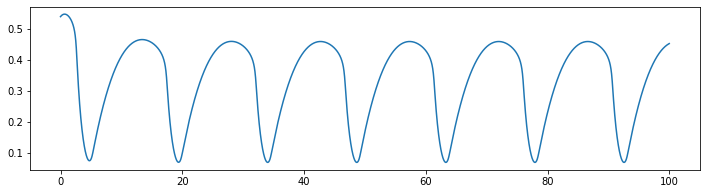

In [165]:
plt.plot(t, h)

In [166]:
print_finals(V, m, n, h)  

Final values of V, m, h, and n are as follws:
V_final = [-63.49837713]
m_final = [0.05969578]
h_final = [0.45288601]
n_final = [0.39735307]


Now, in the figure, you may use the pan/zoom tool to adjust the linked subplots.

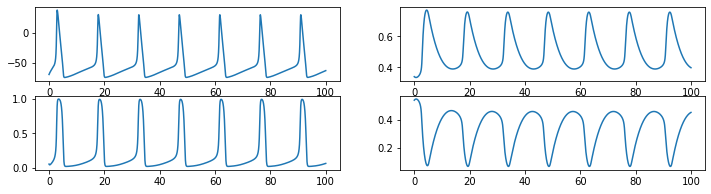

In [167]:
def plote(V, n, m, h, t):
  ax1 = plt.subplot(2, 2, 1)
  ax1.plot(t, V)
  ax2 = plt.subplot(2, 2, 2, sharex = ax1)
  ax2.plot(t, n)
  ax3 = plt.subplot(2, 2, 3, sharex = ax1)
  ax3.plot(t, m)
  ax4 = plt.subplot(2, 2, 4, sharex = ax1)
  ax4.plot(t, h)

plote(V, n, m, h, t)

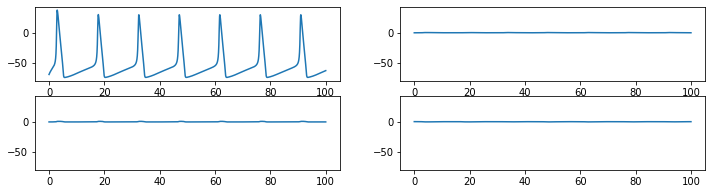

In [170]:
def plotf(V, n, m, h, t):
  ax1 = plt.subplot(2, 2, 1)
  ax1.plot(t, V)
  ax2 = plt.subplot(2, 2, 2, sharey = ax1)
  ax2.plot(t, n)
  ax3 = plt.subplot(2, 2, 3, sharey = ax1)
  ax3.plot(t, m)
  ax4 = plt.subplot(2, 2, 4, sharey = ax1)
  ax4.plot(t, h)

plotf(V, n, m, h, t)

##Bonus (+10 points):
At (`I0=10`), describe the dynamics of the conductances.

please visualize how the *conductances* evolve during a single spike (plot gNa, gK, gL through time)   

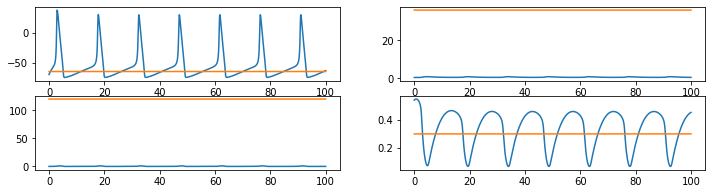

In [168]:
gNa0 = 120   # [mS/cm^2] maximum conductivity of Na+ Channel
gK0  = 36;   # [mS/cm^2] maximum conductivity of K+ Channel
gL0  = 0.3;  # [mS/cm^2] conductivity of leak Channel
[V,m,h,n,t]=HH(10,100)
ax1 = plt.subplot(2, 2, 1)
ax1.plot(t, V)
ax1.plot(t, np.ones(t.shape) * -65)
ax2 = plt.subplot(2, 2, 2, sharex = ax1)
ax2.plot(t, n)
ax2.plot(t, np.ones(t.shape) * gK0)
ax3 = plt.subplot(2, 2, 3, sharex = ax1)
ax3.plot(t, m)
ax3.plot(t, np.ones(t.shape) * gNa0)
ax4 = plt.subplot(2, 2, 4, sharex = ax1)
ax4.plot(t, h)
ax4.plot(t, np.ones(t.shape) * gL0)


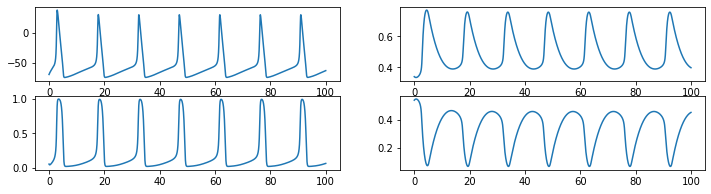

In [169]:
plote(V, n, m, h, t)